In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%pwd

'/home/user/Documents/ML DL PROJECTS/StudentPerformancePredictionMLProject/research'

In [5]:
import os
os.chdir('../')

In [6]:
df = pd.read_csv('datasets/StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
import warnings as warn
warn.filterwarnings('ignore')




In [15]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']


In [16]:
df['total_score'] /= 3

In [18]:
x = df.drop(columns=['total_score','math score','reading score','writing score'],axis=1)

In [22]:
y = df['total_score']

In [20]:
x.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [23]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: total_score, Length: 1000, dtype: float64

In [25]:
df['total_score'] = df['total_score'].astype(int)

In [26]:
y = df['total_score']

In [27]:
y

0      72
1      82
2      92
3      49
4      76
       ..
995    94
996    57
997    65
998    74
999    83
Name: total_score, Length: 1000, dtype: int64

In [30]:
for i in x.columns:
    print(i,+df[i].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


In [34]:
num_features = [i for i in df.columns if df[i].dtype != 'O']
cat_features = [i for i in df.columns if df[i].dtype == 'O']

In [91]:
num_features = ['reading score','writing score']

In [92]:
cat_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [37]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
num_trans = StandardScaler()
ohe = OneHotEncoder()
from sklearn.compose import ColumnTransformer

In [95]:
preprocessor = ColumnTransformer([('ohe', ohe, cat_features),
            ('scaler',num_trans ,num_features)])

In [41]:
# df1 = x.copy()
# df1['total_score'] = y

In [42]:
df1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,total_score
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,82
2,female,group B,master's degree,standard,none,92
3,male,group A,associate's degree,free/reduced,none,49
4,male,group C,some college,standard,none,76


In [87]:
x = df.drop(['math score','total_score'],axis = 1)
y = df['math score']

In [88]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [73]:
# x = df1.drop('total_score',axis=1)
# y = df1['total_score']

In [96]:
x = preprocessor.fit_transform(x)

In [97]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [98]:
x.shape


(1000, 19)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test, y_train,y_test = train_test_split(x,y,random_state=42,test_size =.25)

In [101]:
x_train.shape

(750, 19)

In [102]:
y_train.shape

(750,)

In [103]:
y_train

82     50
991    65
789    52
894    59
398    74
       ..
106    87
270    69
860    53
435    50
102    85
Name: math score, Length: 750, dtype: int64

In [104]:
x_train

array([[ 0.        ,  1.        ,  1.        , ...,  0.        ,
        -1.51916447, -0.9253323 ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.8792638 ,  0.65485663],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.28568707, -0.46444386],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
        -0.49126664, -0.99117351],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -1.45063795, -0.99117351],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.4960025 ,  1.37910989]])

In [119]:
def evaluate_model(y_act,y_pred):
    mae = mean_absolute_error(y_act,y_pred)
    mse = mean_squared_error(y_act,y_pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_act,y_pred)
    adjusted_r2_square = 1-((1-r2_square)*(len(x_train)-1)/(len(x_train)-x_test.shape[1]-1))
    return mae, mse, rmse, r2_square, adjusted_r2_square

In [116]:
models = {'Linear Regression': LinearRegression(),
          'Lasso': Lasso(),
          'Ridge': Ridge(),
          'Decision Tree': DecisionTreeRegressor(),
          'Random Forest': RandomForestRegressor(),
          'KNeighbors Regression': KNeighborsRegressor()}

In [107]:
len(models)

6

In [120]:
model_list = []
r2_list = []
for model in list(models.items()):
    model[1].fit(x_train,y_train)
    y_pred  = model[1].predict(x_test)
    model_list.append(model[0])
    mae,mse,rmse,r2,adj_r2 = evaluate_model(y_test,y_pred)
    r2_list.append(r2)
    print(f"Model: {model[0]}\nMAE: {mae}\nMSE: {mse}\nR2_SCORE: {r2}\nADJUSTED_R2_SCORE: {adj_r2}")
    print()

Model: Linear Regression
MAE: 4.337930600167405
MSE: 30.058114626720357
R2_SCORE: 0.8778243107659014
ADJUSTED_R2_SCORE: 0.8746443955666577

Model: Lasso
MAE: 5.2217100046729215
MSE: 44.27752059355697
R2_SCORE: 0.8200274147838306
ADJUSTED_R2_SCORE: 0.8153431968124508

Model: Ridge
MAE: 4.335372419388226
MSE: 30.017315591232276
R2_SCORE: 0.8779901445296868
ADJUSTED_R2_SCORE: 0.8748145455516924

Model: Decision Tree
MAE: 5.904
MSE: 57.008
R2_SCORE: 0.7682824828385637
ADJUSTED_R2_SCORE: 0.7622514789672387



Model: Random Forest
MAE: 4.728326666666666
MSE: 36.922006065532884
R2_SCORE: 0.8499250004538876
ADJUSTED_R2_SCORE: 0.8460189388218655

Model: KNeighbors Regression
MAE: 5.52
MSE: 50.865919999999996
R2_SCORE: 0.7932478829193754
ADJUSTED_R2_SCORE: 0.7878666634337154



In [121]:
model_list[r2_list.index(max(r2_list))]

'Ridge'

In [124]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.80


Text(0, 0.5, 'Predicted')

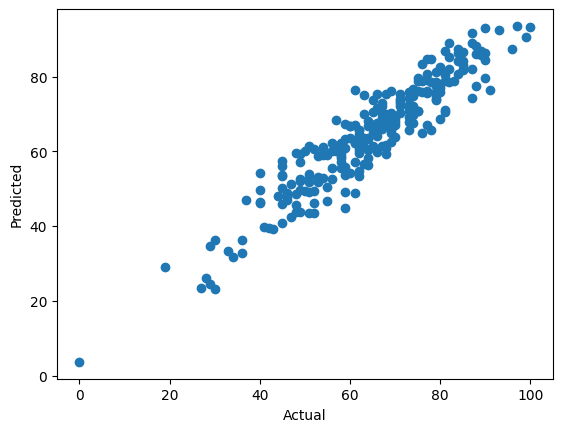

In [126]:

plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

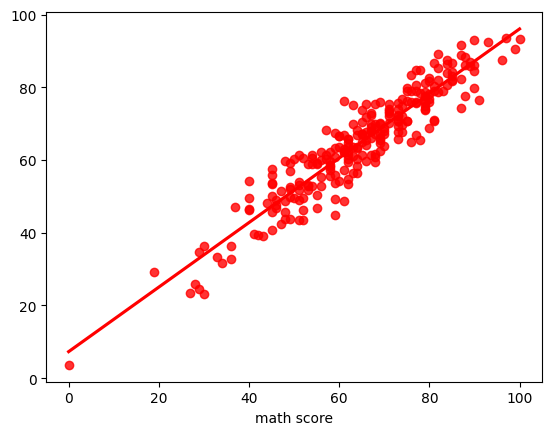

In [128]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [132]:
x = df1.drop('total_score',axis=1)
y = df1['total_score']

In [134]:
preprocessor = ColumnTransformer([('ohe', ohe, cat_features)])

In [135]:
x = preprocessor.fit_transform(x)

In [137]:
x

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [138]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=.25,random_state=42)

In [142]:
def evaluate_model(y_act,y_pred):
    mae = mean_absolute_error(y_act,y_pred)
    mse = mean_squared_error(y_act,y_pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_act,y_pred)
    adjusted_r2_square = 1-((1-r2_square)*(len(y_train)-1)/(len(y_train)-x_test.shape[1]-1))
    return mae, mse, rmse, r2_square, adjusted_r2_square
model_list = []
r2_list = []
for model in list(models.items()):
    model[1].fit(x_train,y_train)
    y_pred  = model[1].predict(x_test)
    model_list.append(model[0])
    mae,mse,rmse,r2,adj_r2 = evaluate_model(y_test,y_pred)
    r2_list.append(r2)
    print(f"Model: {model[0]}\nMAE: {mae}\nMSE: {mse}\nR2_SCORE: {r2}\nADJUSTED_R2_SCORE: {adj_r2}")
    print()

Model: Linear Regression
MAE: 10.531510451185746
MSE: 179.40357384880923
R2_SCORE: 0.19735150489385156
ADJUSTED_R2_SCORE: 0.17871076115504758

Model: Lasso
MAE: 11.234240168277395
MSE: 207.44293015572737
R2_SCORE: 0.07190390839023086
ADJUSTED_R2_SCORE: 0.05034976418617887

Model: Ridge
MAE: 10.533967711713185
MSE: 179.48223614403793
R2_SCORE: 0.1969995711417396
ADJUSTED_R2_SCORE: 0.17835065407809148

Model: Decision Tree
MAE: 12.219123543123544
MSE: 240.12970294103968
R2_SCORE: -0.07433614928062515
ADJUSTED_R2_SCORE: -0.09928657897703297



Model: Random Forest
MAE: 11.904409444803267
MSE: 229.56789043274333
R2_SCORE: -0.027082782285151374
ADJUSTED_R2_SCORE: -0.05093579772073542

Model: KNeighbors Regression
MAE: 11.888000000000002
MSE: 220.80159999999998
R2_SCORE: 0.012137449912868359
ADJUSTED_R2_SCORE: -0.010804713135603272

